# Step 1: Data Preparation

Since data preparation is a crucial step in the data science and machine learning workflow, we start with having a look at our data, its structure and flaws. Our primary goals in this phase include, however we might not follow the order listed below:

**1. Cleaning Data:**
    - Removing or correcting errors and inconsistencies in the data.

**2. Transforming Data:**
    - Standardizing or normalizing numerical features to ensure consistency and comparability.
    - Encoding categorical variables into numerical representations that can be used by machine learning algorithms.
    - Creating new features or aggregating existing ones to extract more meaningful information.
    
**3. Handling Missing Values:**
    - Choosing appropriate strategies for handling missing data, such as mean imputation, median imputation, or more advanced methods like regression imputation.
    
**4. Dealing with Outliers (We might decide to postpone this step to a later point.):**
    - Identifying and addressing outliers that can significantly impact the analysis or model performance.
    
**5. Feature Engineering ((We might decide to postpone this step to a later point.)**:
    - Selecting, transforming or creating new features to enhance the performance of our ML models.
    
**6. Data Formatting:**
    - Ensuring that the data is in the right format for the chosen analysis and modeling techniques.

In the next steps, we import the necessary packages and load our datasets. We first start with the charging sessiong dataset.

In [1]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
dfCharging = pd.read_csv("Data/charging_sessions.csv")
dfCharging.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [3]:
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [4]:
#remove the first "Unnamed" Column
dfCharging = dfCharging.drop('Unnamed: 0', axis=1)
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   timezone          66450 non-null  object 
 10  userID            49187 non-null  float64
 11  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.1+ MB


In [5]:
# test if there a duplicate rows
len(dfCharging)-len(dfCharging.drop_duplicates())

1413

In [6]:
# remove duplicate rows
dfCharging = dfCharging.drop_duplicates()

In [7]:
# Check for missing values
print(dfCharging.isnull().sum())

id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
userInputs          17215
dtype: int64


We note that the columns , 'userID', 'userInputs' and 'doneChargingTime' have a considerable number of missing values.

First we check if the 'userID' matches the 'userInputs'

In [8]:
# Check whether the lines with missing 'userInputs' also have missing 'userID'
missing_userInputs = dfCharging['userInputs'].isnull()
missing_userID = dfCharging['userID'].isnull()

# Check that the missing values match
matching_missing = dfCharging[missing_userInputs & missing_userID]

# Output the number of matching lines
print(f'Number of lines with missing "userID" and "userIputs": {len(matching_missing)}')

# Calculate percentage of match
total_missing_userInputs = len(dfCharging[missing_userInputs])
if total_missing_userInputs > 0:
    matching_percentage = (len(matching_missing) / total_missing_userInputs) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')


Number of lines with missing "userID" and "userIputs": 17215
Percentage of compliance: 100.00%


In [9]:
dfCharging['userID'].head()

0     194.0
1    4275.0
2     344.0
3    1117.0
4     334.0
Name: userID, dtype: float64

In [10]:
dfCharging['userInputs'].head()

0    [{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...
1    [{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...
2    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
3    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
4    [{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...
Name: userInputs, dtype: object

In [11]:
for i in range(5):
    print(dfCharging['userInputs'].iloc[i])
    print("\n")

[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]


[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]


[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]


[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'min

But another important point could be to check out if the amount of missing data in these columns is significantly high

In [12]:
#Calculate total amount of observations recorded
total_observations_userID = len(dfCharging["userID"])
total_observations_userInputs = len(dfCharging["userInputs"])

#Calculate the amount of missing data
total_missing_userID = dfCharging["userID"].isnull().sum()
total_missing_userInputs = dfCharging["userInputs"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_userID = 100 * total_missing_userID / total_observations_userID
percentage_missing_userInputs = 100 * total_missing_userInputs / total_observations_userInputs

#Print the results
print("The percentage of missing data in userID:", percentage_missing_userID)
print("The percentage of missing data in userInputs:", percentage_missing_userInputs)



The percentage of missing data in userID: 26.469548103387304
The percentage of missing data in userInputs: 26.469548103387304


### Dealing with Missing Data

From the previous operations we see that almost a quarter of our data in these columns are missing. Therefore, we now have to decide how to deal with the missing data

- Do we remove the rows with the missing data?

- Do we keep the rows but ignore that these values are missing?

- Do we consider ways to impute the missing values?

In [13]:
print(dfCharging[['connectionTime', 'disconnectTime', 'doneChargingTime']].head())

              connectionTime             disconnectTime  \
0  2020-01-02 13:08:54+00:00  2020-01-02 19:11:15+00:00   
1  2020-01-02 13:36:50+00:00  2020-01-02 22:38:21+00:00   
2  2020-01-02 13:56:35+00:00  2020-01-03 00:39:22+00:00   
3  2020-01-02 13:59:58+00:00  2020-01-02 16:38:39+00:00   
4  2020-01-02 14:00:01+00:00  2020-01-02 22:08:40+00:00   

            doneChargingTime  
0  2020-01-02 17:31:35+00:00  
1  2020-01-02 20:18:05+00:00  
2  2020-01-02 16:35:06+00:00  
3  2020-01-02 15:18:45+00:00  
4  2020-01-02 18:17:30+00:00  


In [14]:
#Calculate total amount of observations recorded
total_observations_doneChargingTime = len(dfCharging["doneChargingTime"])

#Calculate the amount of missing data
total_missing_doneChargingTime = dfCharging["doneChargingTime"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_doneChargingTime = 100 * total_missing_doneChargingTime / total_observations_doneChargingTime

#Print the results
print("The percentage of missing data in doneChargingTime:", percentage_missing_doneChargingTime)

The percentage of missing data in doneChargingTime: 6.284115195965374


In [15]:
# Convert to datetime
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

# Calculate the charging duration
dfCharging['calculatedDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']

# Convert the charging duration to hours
dfCharging['calculatedDurationHours'] = dfCharging['calculatedDuration'].dt.total_seconds() / 3600

# Calculate the median and standard deviation of charging duration
# These statistics provide insights into the central tendency and dispersion of charging durations across all sessions
median_duration_hours = dfCharging['calculatedDurationHours'].median()
std_duration_hours = dfCharging['calculatedDurationHours'].std()

# Print the calculated statistics
print(f'Median of Charging Duration: {median_duration_hours:.2f} hours')
print(f'Standard Deviation of Charging Duration: {std_duration_hours:.2f} hours')

Median of Charging Duration: 2.76 hours
Standard Deviation of Charging Duration: 3.06 hours


Correlation between charging duration and kWh delivered in complete cases: 0.5322274987647438


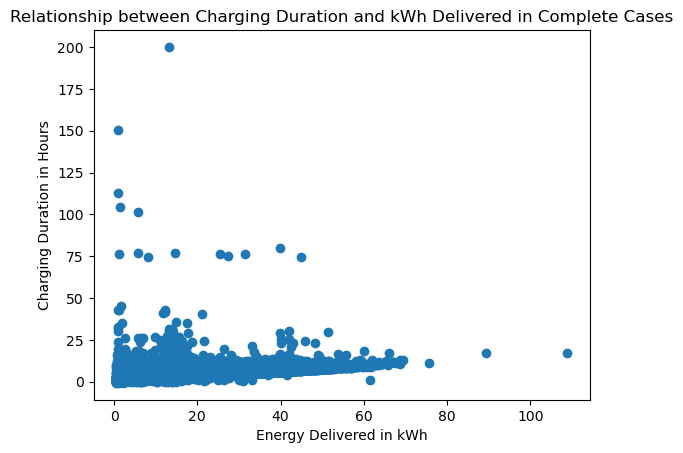

In [16]:
# Calculate charging duration in hours
dfCharging['chargingDuration'] = (dfCharging['doneChargingTime'] - dfCharging['connectionTime']).dt.total_seconds() / 3600

# Create a subset with no missing values for analysis
subset = dfCharging.dropna(subset=['chargingDuration', 'kWhDelivered'])

# Calculate correlation on the subset
correlation = subset['chargingDuration'].corr(subset['kWhDelivered'])
print(f'Correlation between charging duration and kWh delivered in complete cases: {correlation}')

# Scatter plot on the subset
plt.scatter(subset['kWhDelivered'], subset['chargingDuration'])
plt.xlabel('Energy Delivered in kWh')
plt.ylabel('Charging Duration in Hours')
plt.title('Relationship between Charging Duration and kWh Delivered in Complete Cases')
plt.show()

### Decision Point 1:
Another column with a lot of missing data is the doneChargingTime column.

But doneChargingTime could also be calculated using two other columns with zero missing values, for example by:

*doneChargingTime = disconnectTime - connectionTime*

But from line 11 we see that this is not the case, since a EV can still be connected to the system even though it has finished charging. So we should decide what to do:
 
- Do we delete all columns in which there is nothing in doneChargingTime?

- Do we calculate the median of how long it always took from connectionTime to doneChargingTime and then replace the median in the missing columns?

'''
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

dfCharging['calculatedDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']

median_duration = dfCharging['calculatedDuration'].median()

dfCharging.loc[dfCharging['doneChargingTime'].isnull(), 'doneChargingTime'] = dfCharging['connectionTime'] + median_duration
'''

In [17]:
#Load the weather data from burbank airport
dfWeather = pd.read_csv("Data/weather_burbank_airport.csv")
dfWeather.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [18]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [19]:
# test if there a duplicate rows
len(dfWeather)-len(dfWeather.drop_duplicates())

0

No duplicates available

In [20]:
# Check for missing values
print(dfWeather.isnull().sum())

city                        0
timestamp                   0
temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
precipitation               0
felt_temperature           26
dtype: int64


The columns , ‘temperature’, ‘cloud_cover’, 'cloud_cover_description', 'pressure', 'windspeed' and ‘felt_temperature’ have a number of missing values.

First we check if 'cloud_cover' and 'cloud_cover_description' columns match the userInputs

In [21]:
# Check whether the lines with missing 'cloud_cover' also have missing 'cloud_cover_description'
missing_userInputs = dfWeather['cloud_cover'].isnull()
missing_userID = dfWeather['cloud_cover_description'].isnull()

# Check that the missing values match
matching_missing = dfWeather[missing_userInputs & missing_userID]

# Output the number of matching lines
print(f'Number of lines with missing "cloud_cover" and "cloud_cover_description": {len(matching_missing)}')

# Calculate percentage of match
total_missing_userInputs = len(dfWeather[missing_userInputs])
if total_missing_userInputs > 0:
    matching_percentage = (len(matching_missing) / total_missing_userInputs) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')

Number of lines with missing "cloud_cover" and "cloud_cover_description": 20
Percentage of compliance: 100.00%


At this point we could again check if the amount of missing data is significantly high

In [22]:
#Calculate total amount of observations recorded
total_observations_cloud_cover = len(dfWeather["cloud_cover"])
total_observations_cloud_cover_description = len(dfWeather["cloud_cover_description"])

#Calculate the amount of missing data
total_missing_cloud_cover = dfWeather["cloud_cover"].isnull().sum()
total_missing_cloud_cover_description = dfWeather["cloud_cover_description"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_cloud_cover = 100 * total_missing_cloud_cover / total_observations_cloud_cover
percentage_missing_cloud_cover_description = 100 * total_missing_cloud_cover_description / total_observations_cloud_cover_description

#Print the results
print("The percentage of missing data in cloud_cover:", percentage_missing_cloud_cover)
print("The percentage of missing data in cloud_cover_description:", percentage_missing_cloud_cover_description)



The percentage of missing data in cloud_cover: 0.0683900971139379
The percentage of missing data in cloud_cover_description: 0.0683900971139379


We see that only 0,068% of our data is missing. We now could check the other columns with missing values to see how much of our data is missing there. We build a a for loop to do this faster. 

In [23]:
# List of columns to check for missing values
columns_to_check = ["temperature", "pressure", "windspeed", "felt_temperature"] 

for column in columns_to_check:
    total_observations = len(dfWeather[column])
    total_missing = dfWeather[column].isnull().sum()
    percentage_missing = 100 * total_missing / total_observations
    print(f"Percentage of missing values in {column}: {percentage_missing:.2f}%")


Percentage of missing values in temperature: 0.09%
Percentage of missing values in pressure: 0.03%
Percentage of missing values in windspeed: 0.29%
Percentage of missing values in felt_temperature: 0.09%


### Decision Point 2:

We now have to decide what to do with the missing data

- Do we remove the rows with the missing data?

- Do we keep the rows but ignore that these values are missing?

- Do we consider ways to impute the missing values?

For **weather data** we decide apply mean imputation for the following columns:

- temperature
- cloud cover
- pressure
- windspeed
- felt temperature

In [24]:
# Sort the DataFrame by timestamp
dfWeather.sort_values(by='timestamp', inplace=True)

# Function to impute missing values using the mean of neighboring values
def impute_missing_values(column, window_size=5):
    # Calculate the mean using a rolling window
    # We have to use a window for the cases where some neighboring values are also missing.
    return column.fillna(column.rolling(window=window_size, min_periods=1).mean())

# Apply the imputation function to the specified columns
columns_to_impute = ['temperature', 'cloud_cover', 'windspeed', 'pressure',"felt_temperature"]

for column in columns_to_impute:
    dfWeather[column] = impute_missing_values(dfWeather[column])

# Verify the changes
print(dfWeather.isnull().sum())



city                        0
timestamp                   0
temperature                 0
cloud_cover                 0
cloud_cover_description    20
pressure                    0
windspeed                   0
precipitation               0
felt_temperature            0
dtype: int64


In [25]:
def fill_missing_cloud_cover_description(dfWeather):
    dfWeather = dfWeather.sort_values(by='timestamp')  # Actually not needed because of the previous function

    for index, row in dfWeather.iterrows():
        if pd.isnull(row['cloud_cover_description']):
            # Round the 'cloud_cover' value
            rounded_cloud_cover = round(row['cloud_cover'])

            # Try to find a match with the rounded 'cloud_cover'
            matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover) & (~pd.isnull(dfWeather['cloud_cover_description']))]

            if not matching_rows.empty:
                matching_description = matching_rows['cloud_cover_description'].values[0]
                dfWeather.at[index, 'cloud_cover_description'] = matching_description
            else:
                # If no match is found, try to find a match for 'rounded_cloud_cover + 1'
                next_matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover + 1) & (~pd.isnull(dfWeather['cloud_cover_description']))]

                if not next_matching_rows.empty:
                    next_matching_description = next_matching_rows['cloud_cover_description'].values[0]
                    dfWeather.at[index, 'cloud_cover_description'] = next_matching_description

    return dfWeather

dfWeather = fill_missing_cloud_cover_description(dfWeather)

# Verify the changes
print(dfWeather.isnull().sum())


city                       0
timestamp                  0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
dtype: int64


In [26]:
# Convert the time columns to datetime objects
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

# Compute the time differences
dfCharging['disconnectDuration'] = dfCharging['disconnectTime'] - dfCharging['connectionTime']
dfCharging['doneChargingDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']
dfCharging['doneToDisconnectDuration'] = dfCharging['disconnectTime'] - dfCharging['doneChargingTime']





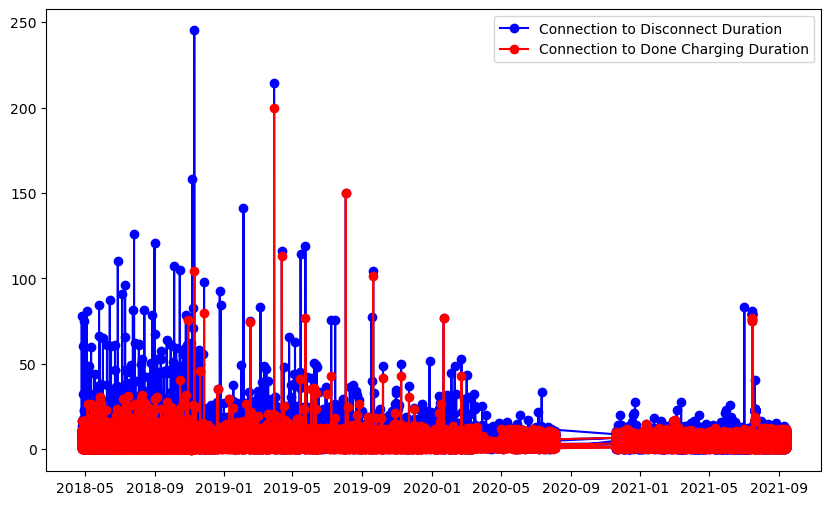

In [27]:
from matplotlib import pyplot as plt

# Plot the duration
plt.figure(figsize=(10, 6))

plt.plot(dfCharging['connectionTime'], dfCharging['disconnectDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='b', label='Connection to Disconnect Duration')
plt.plot(dfCharging['connectionTime'], dfCharging['doneChargingDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='r', label='Connection to Done Charging Duration')

plt.legend()

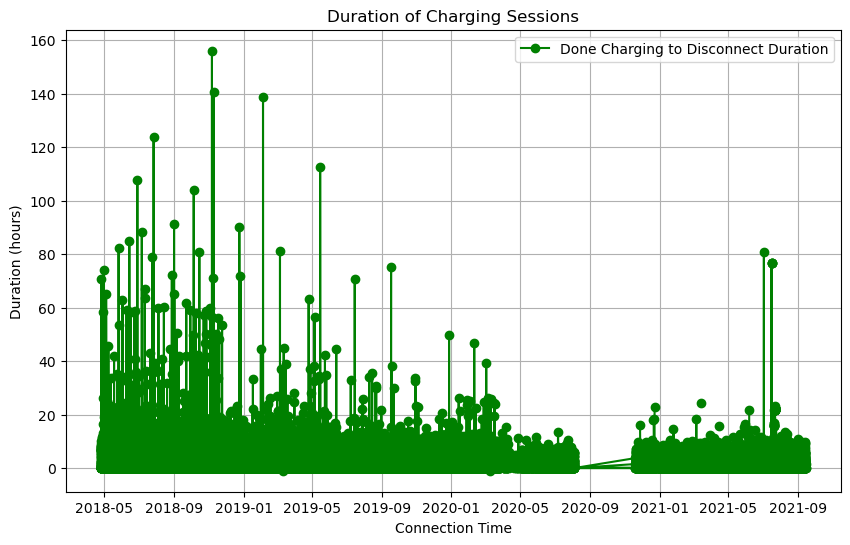

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Duration of Charging Sessions')
plt.xlabel('Connection Time')
plt.ylabel('Duration (hours)')
plt.plot(dfCharging['connectionTime'], dfCharging['doneToDisconnectDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='g', label='Done Charging to Disconnect Duration')

plt.legend()
plt.grid(True)
plt.show()

In [29]:
dfCharging["siteID"].unique()

array([1, 2], dtype=int64)

## Analysis of missing values of 'doneChargingTime'

In [30]:
import json
import math

In [31]:
#methods for data transformation

#transform 'userInputs' object to dictionary data type
def userInputStringToDictionary(entry):
    
    s = entry.replace("\'", "\"").replace("True", "1").replace("False","0")
    return json.loads(s)[0]

#cast of time variables
def transformDictionaryForTimeComparison(entry):
    
    entry['minutesAvailable'] = int(entry['minutesAvailable'])
    entry['modifiedAt'] = pd.to_datetime(entry['modifiedAt'])
    entry['requestedDeparture'] = pd.to_datetime(entry['requestedDeparture'])
    return entry

#checks if 'minutesAvailable' == 'requestedDeparture' - 'connectionTime' and sets true or false for new dictionary value 
#'minutesAvailableValid'
def calculateTimeDelta(entry):
    
    deltaUp = math.ceil((entry['userInputs']['requestedDeparture']-entry['connectionTime']).total_seconds() / 60)
    deltaDown = deltaUp - 1
    result = (deltaUp == entry['userInputs']['minutesAvailable']) or (deltaDown == entry['userInputs']['minutesAvailable'])
    entry['userInputs']['minutesAvailableValid'] = result
    return entry['userInputs']

#return 'requestedDeparture' value from dictionary 'userInputs'
def returnRequestedDeparture(entry):
    
    return entry['requestedDeparture']

#return 'kWhRequested' value from dictionary 'userInputs'
def returnKwhRequested(entry):
    
    return entry['kWhRequested']

In [32]:
dfFull = dfCharging.copy()

#Transform dateTime columns
dfFull['connectionTime'] = pd.to_datetime(dfFull['connectionTime'])
dfFull['disconnectTime'] = pd.to_datetime(dfFull['disconnectTime'])
dfFull['doneChargingTime'] = pd.to_datetime(dfFull['doneChargingTime'])

#Transform 'userInputs' into dictionary type
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(userInputStringToDictionary)

#Transform datetime values in dictionary to dateTime
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(transformDictionaryForTimeComparison)

#Check if 'minutesAvailable' equals 'requestedDeparture' - 'connectionTime'
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()].apply(lambda row: calculateTimeDelta(row), axis=1)

#Create Column for some 'userInput' (dictionary) values
dfFull['requestedDeparture'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(returnRequestedDeparture)
dfFull['kWhRequested'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(returnKwhRequested)

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

In [ ]:
mask = dfFull.dropna(subset=['userInputs'])['userInputs'].apply(lambda x: x.get('minutesAvailableValid', None) is not None and x['minutesAvailableValid'] == True)

dfMask = dfFull.dropna(subset=['userInputs'])[mask]

print('Nr of samples with userInputs: ' + str(dfFull.dropna(subset=['userInputs']).shape[0]))
print('Nr of samples with userInputs where minutesAvailable equals requestedDeparture - connectionTime:: ' + str(dfMask.shape[0]))


In [ ]:
#create dataset with 'doneChargingTime'
dfWithDoneChargingTime = dfFull.dropna(subset=['doneChargingTime']).copy()
nrSamplesWithDoneChargingTime = dfWithDoneChargingTime.shape[0]

#create dataset with 'doneChargingTime' AND 'userInput'
dfWithDoneChargingTimeAndUserInputs = dfWithDoneChargingTime.dropna(subset=['userInputs']).copy()

#create dataset without 'doneChargingTime'
dfNaNdoneChargingTime = dfFull[dfFull['doneChargingTime'].isnull()].copy()
nrSamplesNanDoneChargingTime = dfNaNdoneChargingTime.shape[0]

#create dataset without 'doneChargingTime' AND with 'userInput'
dfNoDoneTimeWithUserInputs = dfNaNdoneChargingTime.dropna(subset=['userInputs']).copy()
nrSamplesNoDoneTimeWithUserInputs = dfNoDoneTimeWithUserInputs.shape[0]


In [ ]:
#Get samples without 'doneChargingTime', with 'userInput' and fullfilled kWh request
dfDeliveredKwh = dfNoDoneTimeWithUserInputs[dfNoDoneTimeWithUserInputs['kWhDelivered'] >= dfNoDoneTimeWithUserInputs['kWhRequested']]

print('Nr of samples where without doneChargingTime, with userInput and fullfilled kWh request: ' + str(dfDeliveredKwh.shape[0]))

#Nr of samples where the car wasnt charged to the requested amount -> 'doneChargingTime' == 'disconnectTime'?
nrNotDeliveredKwh = dfNoDoneTimeWithUserInputs[dfNoDoneTimeWithUserInputs['kWhDelivered'] < dfNoDoneTimeWithUserInputs['kWhRequested']].shape[0]
print('Nr of samples without doneChargingTime, with userInput and not fullfilled kWh request: ' + str(nrNotDeliveredKwh))

print(str(nrSamplesNoDoneTimeWithUserInputs/nrSamplesNanDoneChargingTime) + "% of the samples where doneChargingTime is missing have userInputs")

print(str(nrNotDeliveredKwh/nrSamplesNanDoneChargingTime) + '% of the samples where doneChargingTime is missing have not fullfiled the kWh request')


If it means that when the kWh request was not fullfiled, the doneChargingTime is just the disconnectTime, then we could set 71% of the missing doneChargingTime values.

So lets have a look at the samples with doneChargingTime and not fullfiled kWh Request. If it is true that doneChargingTime == disconnectTime, then we can solve 71% of the missing values.

In [ ]:
def calcDiffDisconnectAndDoneCharging(entry):
    
    return (entry['disconnectTime']-entry['doneChargingTime']).total_seconds()/60/60

dfNotDeliveredKwh = dfWithDoneChargingTimeAndUserInputs[dfWithDoneChargingTimeAndUserInputs['kWhDelivered'] < dfWithDoneChargingTimeAndUserInputs['kWhRequested']]

dfCalc = dfWithDoneChargingTimeAndUserInputs.apply(lambda row: calcDiffDisconnectAndDoneCharging(row), axis=1)

plt.scatter(dfWithDoneChargingTimeAndUserInputs.index, dfCalc, marker='o', linestyle='-')

# Set x and y-axis limits
#plt.xlim(left=0, right=len(df.index) - 1)  # Adjust left and right as needed
plt.ylim(bottom=-50, top=100)  # Adjust bottom as needed


# Set labels and title
plt.xlabel('samples')
#plt.ylabel()
plt.title('Deviation disconnectTime from doneChargingTime when kWh request not fullfiled in hours')

# Show the plot
plt.show()

We see that there exist huge deviations between disconnectTime and doneChargingTime when kWh request is not fullfiled. So we cant just set the missing values to be the disconnectTime where kWh request is not fullfiled.
#### Probably the utilization of the stations influences the doneChargingTime
Which also raises questions as to why, in cases with a deviation of more than e.g. 10 hours, the kWh request was not fullfilled 

#### Can we just use 'minutesAvailable' and 'requestedkWh' to estimate 'doneChargingTime'?

Is the rate of the delivered kWh just stretched to the expected time of availability?
Lets look at samples with 'doneChargingTime' and fullfilled kWhRequest. Does the 'doneChargingTime' equal 'connectionTime' + 'minutesAvailable'?

In [ ]:
def calcDiffDepartAndDoneCharging(entry):
    
    return (entry['requestedDeparture']-entry['doneChargingTime']).total_seconds()/60/60

dfDeliveredKwh = dfWithDoneChargingTimeAndUserInputs[dfWithDoneChargingTimeAndUserInputs['kWhDelivered'] >= dfWithDoneChargingTimeAndUserInputs['kWhRequested']]

dfCalc = dfDeliveredKwh.apply(lambda row: calcDiffDepartAndDoneCharging(row), axis=1)

plt.scatter(dfDeliveredKwh.index, dfCalc, marker='o', linestyle='-')

# Set x and y-axis limits
#plt.xlim(left=0, right=len(df.index) - 1)  # Adjust left and right as needed
plt.ylim(bottom=-50, top=50)  # Adjust bottom as needed


# Set labels and title
plt.xlabel('samples')
#plt.ylabel()
plt.title('Deviation requestedDeparture from doneChargingTime where kWh request was fullfiled in hours')

# Show the plot
plt.show()

Positive values mean that the 'doneChargingTime' was before the originally requested departure time.
Negative values mean that the actual departure was later than requested originally and the 'doneChargingTime' was also after the originally requested departure time. 
#### Too many deviations from 'requestedDeparture' and 'doneChargingTime'

### Average delivered kWh per hour 

Look at samples with 'doneChargingTime' and calculate the charging time. Then get the average by looking at the delivered kWh. Maybe we can use that to estimate the missing values of doneChargingTime where we have kWhRequested from userInputs. Since it seems that the doneChargingTime is influenced by the utilization of the stations, hope is not great.

In [ ]:
dfWithDoneChargingTime['chargingTimeInH'] = dfWithDoneChargingTime['doneChargingTime'] - dfWithDoneChargingTime['connectionTime']
dfWithDoneChargingTime['chargingTimeInH'] = dfWithDoneChargingTime['chargingTimeInH'].apply(lambda x: x.total_seconds()/60/60)
dfWithDoneChargingTime = dfWithDoneChargingTime[dfWithDoneChargingTime['chargingTimeInH'] > 0]
dfWithDoneChargingTime['kWhPerH'] = dfWithDoneChargingTime['kWhDelivered']/dfWithDoneChargingTime['chargingTimeInH']
dfWithDoneChargingTime = dfWithDoneChargingTime.dropna(subset=['kWhPerH'])


In [ ]:
dfWithDoneChargingTime['kWhPerH'].var()

The kWh per hour values vary far too much, which strongly suggests that you have to look very closely at the utilisation of the stations here. But there could also be another logic behind the charging scheduling which is not deducible from the given dataset.

#### Since "only" 6% of the samples are missing doneChargingTime, and we would need to make assumptions that we are not sure about to further investigate this matter, and we dont know how important this feature will be for our further work at this moment, we just leave it like it is. Later we can consider if we drop the samples with missing values or drop the feature itself or make further investigations (which is unlikely).

## Next Steps


- Merge charging and weather data
- Look for the amount missing values in weather data after merging
- Check if there are other weather data available somewhere else
- (Maybe) separate charging data depending on sideID and check for doneCharging/disconnectTime differences

## Merging the two DataFrames

In [32]:
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Unnamed: 0                66450 non-null  int64              
 1   id                        66450 non-null  object             
 2   connectionTime            66450 non-null  datetime64[ns, UTC]
 3   disconnectTime            66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime          62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered              66450 non-null  float64            
 6   sessionID                 66450 non-null  object             
 7   siteID                    66450 non-null  int64              
 8   spaceID                   66450 non-null  object             
 9   stationID                 66450 non-null  object             
 10  timezone                  66450 non-null  object             
 11  userID         

In [33]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29244 non-null  float64
 3   cloud_cover              29244 non-null  float64
 4   cloud_cover_description  29244 non-null  object 
 5   pressure                 29244 non-null  float64
 6   windspeed                29244 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29244 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [34]:
# Convert the type object to datetime
dfWeather["timestamp"] = pd.to_datetime(dfWeather["timestamp"])

In [35]:
# Convert to datetime without timezone information
dfCharging['connectionTime'] = dfCharging['connectionTime'].dt.tz_localize(None)

In [44]:
dfCharging['connectionTime'].head()

0   2020-01-02 13:08:54
1   2020-01-02 13:36:50
2   2020-01-02 13:56:35
3   2020-01-02 13:59:58
4   2020-01-02 14:00:01
Name: connectionTime, dtype: datetime64[ns]

In [45]:
dfWeather['timestamp'].head()

0   2018-01-01 08:53:00
1   2018-01-01 09:53:00
2   2018-01-01 10:53:00
3   2018-01-01 11:53:00
4   2018-01-01 12:53:00
Name: timestamp, dtype: datetime64[ns]

In [56]:
# Sort values for merge_asof to work
dfCharging.sort_values('connectionTime', inplace=True)
dfWeather.sort_values('timestamp', inplace=True)

# Merge the two datasets according to their timestamps. 
# Use merge_asof to merge according to the nearest timestamp found in dfWeather with a tolerance of 5 hours
dfMerged = pd.merge_asof(dfCharging, dfWeather, left_on = "connectionTime", right_on = "timestamp", tolerance = pd.Timedelta(hours=5))
    

In [59]:
dfMerged.isnull().sum()

Unnamed: 0                      0
id                              0
connectionTime                  0
disconnectTime                  0
doneChargingTime             4088
kWhDelivered                    0
sessionID                       0
siteID                          0
spaceID                         0
stationID                       0
timezone                        0
userID                      17263
userInputs                  17263
calculatedDuration           4088
calculatedDurationHours      4088
chargingDuration             4088
disconnectDuration              0
doneChargingDuration         4088
doneToDisconnectDuration     4088
local_connection_time           0
nearest_timestamp               0
city                         9013
timestamp                    9013
temperature                  9013
cloud_cover                  9013
cloud_cover_description      9013
pressure                     9013
windspeed                    9013
precipitation                9013
felt_temperatu

**We are missing weather data for 9013 observations in the charging data.**